# Taller 9: Regresión Lineal

# Completa el código o el texto donde haya unicornios 🦄

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Objetivo

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/1.png?raw=true'>

Vamos a trabajar con el conjunto de datos **"Auto MPG"**. El objetivo de este proyecto es crear un modelo que pueda predecir la eficiencia de combustible (medida en millas por galón, MPG) de un automóvil, dado sus características técnicas (peso, número de cilindros, caballos de fuerza, año de fabricación, etc.).


Este problema puede resolverse construyendo un modelo de regresión que tome como entrada variables como el número de cilindros, el peso del automóvil, la potencia del motor (caballos de fuerza), la aceleración y el año del modelo, y prediga la eficiencia de combustible (MPG) como salida.

# Cargar los datos

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/2.pmg.png?raw=true'>


In [2]:
# Cargar el conjunto de datos Auto MPG desde Seaborn
df = sns.load_dataset('mpg').dropna()

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


| Columna         | Nombre en Español         | Explicación                                                         |
|-----------------|---------------------------|---------------------------------------------------------------------|
| mpg             | millas por galón           | Eficiencia de combustible en millas por galón.                      |
| cylinders       | cilindros                  | Número de cilindros del motor.                                      |
| displacement    | desplazamiento             | Desplazamiento del motor en pulgadas cúbicas.                       |
| horsepower      | caballos de fuerza         | Potencia del motor en caballos de fuerza.                           |
| weight          | peso                       | Peso del automóvil en libras.                                       |
| acceleration    | aceleración                | Tiempo en segundos para acelerar de 0 a 60 millas por hora.         |
| model_year      | año del modelo             | Año de fabricación del automóvil.                                   |
| origin          | origen                     | Región de origen del automóvil.        |
| name            | nombre                     | Nombre o modelo del automóvil.                                      |


# Análisis Exploratorio de Datos
### (Opcional por puntos extras) 🦄

In [4]:
print("\nNúmero de filas y columnas del dataset:")
print(df.shape)


Número de filas y columnas del dataset:
(392, 9)


In [5]:
print("\nResumen de la información del dataset:")
print(df.info())


Resumen de la información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None


In [6]:
# Contar valores faltantes
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [7]:
print("\nEstadísticas descriptivas de las variables numéricas:")
df.describe()


Estadísticas descriptivas de las variables numéricas:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
print("\nEstadísticas descriptivas de las variables categóricas:")
df.describe(include=['object', 'category'])


Estadísticas descriptivas de las variables categóricas:


,origin,name
count,392,392
unique,3,301
top,usa,amc matador
freq,245,5


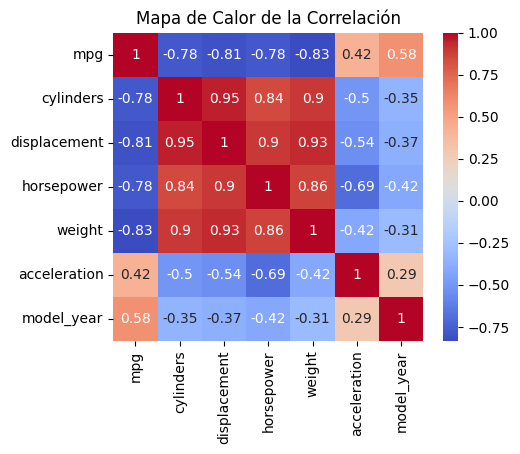

In [9]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor con las columnas numéricas
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación')
plt.show()

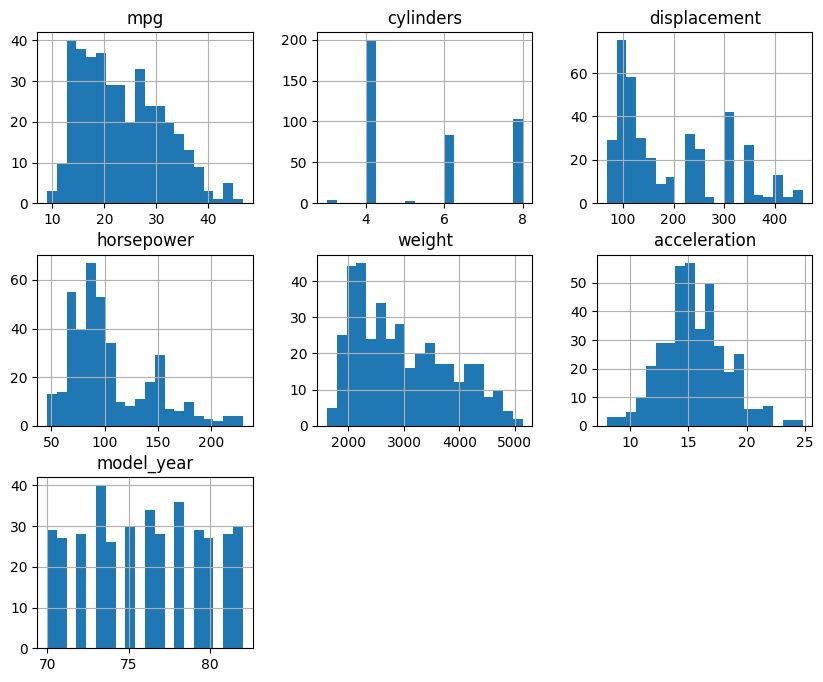

In [10]:
# Crear histogramas para variables numéricas
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

<ipython-input-11-56eba722e50f>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


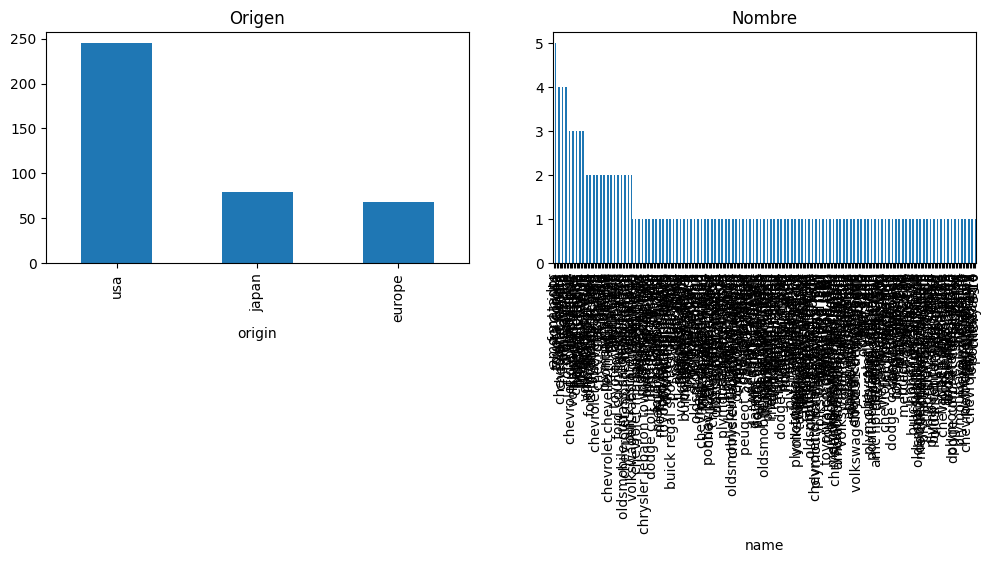

In [11]:
# Crear una figura con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 3))  # 1 fila, 2 columnas

df['origin'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Origen')

df['name'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Nombre') # Aquí vemos que hay muchos nombres, no va a ser una variable útil

plt.tight_layout()
plt.show()

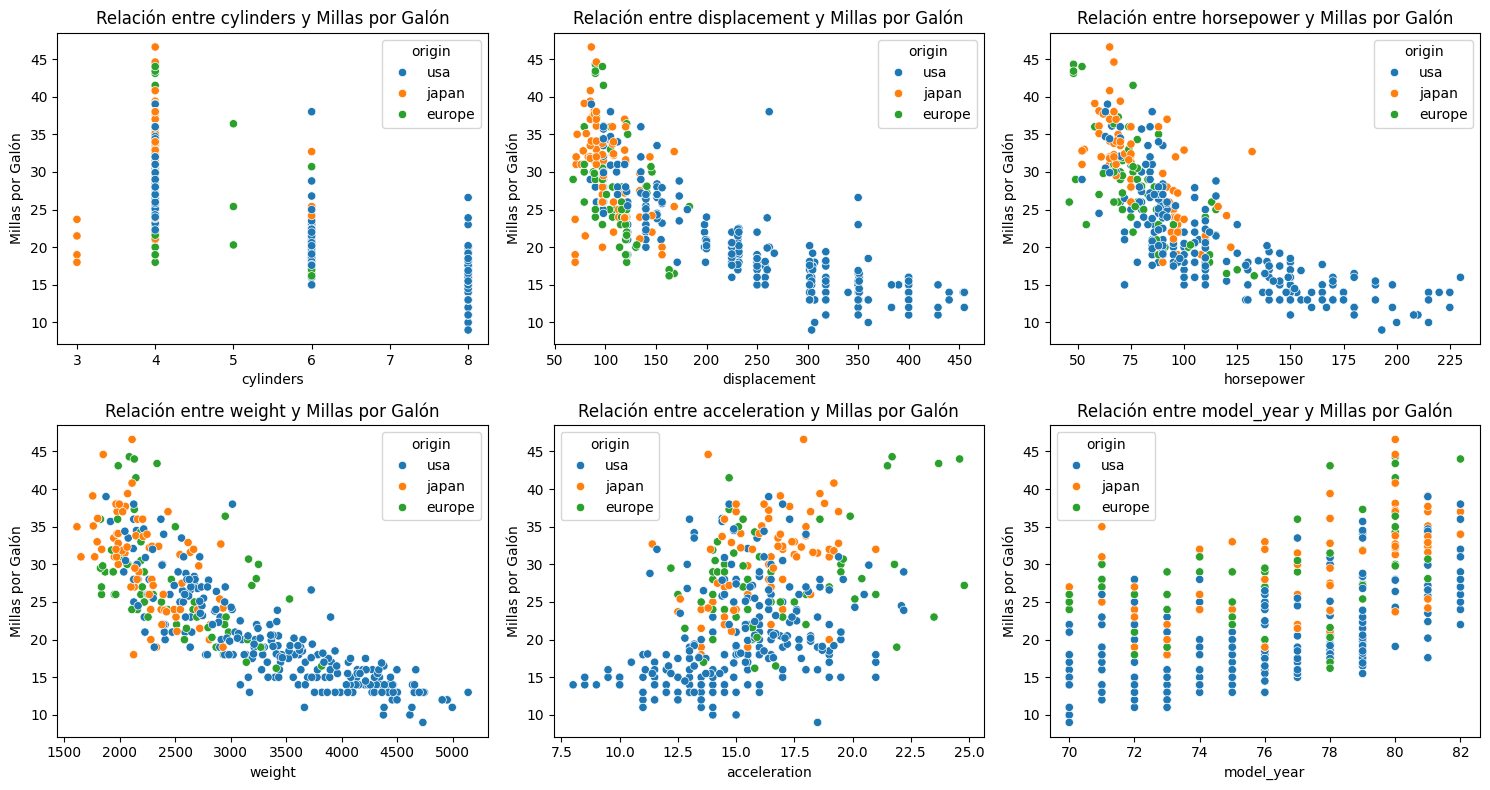

In [12]:
# Variables numéricas
numerical_columns = ['cylinders', 'displacement', 'horsepower', 'weight',
                     'acceleration', 'model_year']

# Calcular el número de filas y columnas necesarias
num_vars = len(numerical_columns)
num_cols = 3  # Número de columnas fijas (puedes ajustar según tu preferencia)
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcular el número de filas

# Crear una figura con subplots dinámicos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Aplanar los ejes para acceder a ellos fácilmente
axes = axes.flatten()

# Iterar sobre cada columna numérica y generar el gráfico en cada subplot
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=df[column], y=df['mpg'], hue= df['origin'], ax=axes[i])
    axes[i].set_title(f'Relación entre {column} y Millas por Galón')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Millas por Galón')

# Eliminar subplots vacíos si hay más subplots que variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# ⚠️ Dividir datos en entrenamiento (train) y prueba (test) ⚠️

Es **crucial** dividir los datos en conjuntos de entrenamiento y prueba **ANTES** de realizar cualquier ingeniería de características o entrenar el modelo.

Si transformas los datos antes de hacer la división, puedes permitir que información del conjunto de prueba se mezcle con los datos de entrenamiento. Esto provoca un sobreajuste, donde el modelo parece funcionar muy bien, pero en realidad no refleja su rendimiento en datos nuevos o desconocidos.

In [13]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['mpg', 'name'])  # Aquí estamos eliminando la columna objetivo y la columna "name" ya que tiene muchas categorias únicas
y = df['mpg']  # Esta es nuestra variable objetivo

In [14]:
# Dividir el conjunto de datos en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Ver el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}. Tamaño de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}. Tamaño de las etiquetas de prueba: {y_test.shape}")

Tamaño del conjunto de entrenamiento: (313, 7). Tamaño de las etiquetas de entrenamiento: (313,)
Tamaño del conjunto de prueba: (79, 7). Tamaño de las etiquetas de prueba: (79,)


# Ingeniería de características

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/3.png?raw=true'>

In [16]:
# Define cuáles columnas son categoricas y cuáles son numéricas
categorical_columns = ['origin'] # 🦄🦄🦄
numerical_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'] #🦄🦄🦄

In [17]:
# Crea un preprocesador que aplique tanto one-hot encoding para las variables categóricas como escalado para las variables numéricas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Estandarizar características numéricas
        ('cat', OneHotEncoder(), categorical_columns)  # Codificación one-hot para las características categóricas
    ])

In [18]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [19]:
# Los nombres de las columnas numéricas columnas no cambian después de la transformación
nombres_columnas_numericas = numerical_columns

# El método get_feature_names_out genera los nombres de las nuevas columnas creadas por OneHotEncoder para las columnas categóricas
nombres_columnas_categoricas = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combinar los nombres de las columnas numéricas y categóricas en una lista
nombres_todas_las_columnas = list(nombres_columnas_numericas) + list(nombres_columnas_categoricas)

nombres_todas_las_columnas

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin_europe',
 'origin_japan',
 'origin_usa']

# Modelaje: Regresion Lineal

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/4.png?raw=true'>

In [20]:
# Entrenamos la regresión lineal
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

# Evaluación del modelo

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/5.png?raw=true'>

In [21]:
# Predicciones
y_pred = model.predict(X_test_processed)

In [22]:
# Cálculo del RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 3.2876628733098383


In [23]:
# Cálculo del R² (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.8166320585958047


### RMSE (Raíz del Error Cuadrático Medio): **3.42** 🦄🦄🦄
- **Interpretación**: El RMSE es una medida de la magnitud promedio del error entre las predicciones del modelo y los valores reales. En este caso, un RMSE de **3.42** significa que, en promedio, el modelo comete un error de alrededor de **3.42 millas por galón (mpg)**.

- **¿Qué tan bueno es?**: Vemos que el rango de valores de millas por galón va de 9 millas a 47 millas, así que un error de 3.42 puede ser aceptable.

### R² (Coeficiente de Determinación): **0.80** 🦄🦄🦄
- **Interpretación**: El R² indica qué proporción de la varianza en los datos está siendo explicada por el modelo. Un R² de **0.80** significa que el **80%** de la variación en **las millas por galón (mpg)** puede ser explicada por las variables del modelo.

- **¿Qué tan bueno es?**: Un R² de 0.80 es generalmente considerado como un buen ajuste, lo que significa que el modelo está capturando la mayor parte de la variabilidad en los datos. Sin embargo, siempre es importante considerar el contexto y las expectativas para el análisis.

# Interpretando el modelo

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/6.png?raw=true'>

In [24]:
# Coeficientes del modelo
coeficientes = model.coef_

In [25]:
for nombre, coef in zip(nombres_todas_las_columnas, coeficientes):
    print(f"Característica: {nombre:<20} Coeficiente: {coef:.4f}")

Característica: cylinders            Coeficiente: -0.6017
Característica: displacement         Coeficiente: 2.4167
Característica: horsepower           Coeficiente: -0.3517
Característica: weight               Coeficiente: -5.9827
Característica: acceleration         Coeficiente: 0.5091
Característica: model_year           Coeficiente: 2.9695
Característica: origin_europe        Coeficiente: 0.7905
Característica: origin_japan         Coeficiente: 1.0587
Característica: origin_usa           Coeficiente: -1.8492


In [26]:
# Obtener el valor de la intersección
intercepto = model.intercept_
intercepto

24.363298567669847

In [28]:
std = df.select_dtypes(include=['number']).std().to_frame(name='Desviación Estándar').rename_axis('Característica').reset_index()
std

,Característica,Desviación Estándar
0,mpg,7.805007
1,cylinders,1.705783
2,displacement,104.644004
3,horsepower,38.491160
4,weight,849.402560
5,acceleration,2.758864
6,model_year,3.683737


In [34]:
# Coeficientes originales del modelo
coeficientes = model.coef_

# Características numéricas y categóricas
caracteristicas_numericas = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
caracteristicas_categoricas = ['origin_europe', 'origin_japan', 'origin_usa']

# Desviaciones estándar de las características numéricas
std_numericas = std[std['Característica'].isin(caracteristicas_numericas)]['Desviación Estándar'].values

# Coeficientes desescalados para características numéricas
coeficientes_desescalados_numericos = coeficientes[:len(caracteristicas_numericas)] / std_numericas

# Coeficientes categóricos no necesitan desescalarse
coeficientes_categoricos = coeficientes[len(caracteristicas_numericas):]

# Unir coeficientes desescalados
coeficientes_desescalados = np.concatenate([coeficientes_desescalados_numericos, coeficientes_categoricos])

# Ajustar el intercepto si es necesario
media_numericas = preprocessor.named_transformers_['num'].mean_
intercepto_desescalado = intercepto - np.sum(coeficientes[:len(caracteristicas_numericas)] * media_numericas / std_numericas)


# Crear la tabla final
tabla_final = pd.DataFrame({
    'Característica': caracteristicas_numericas + caracteristicas_categoricas,
    'Desviación Estándar': list(std_numericas) + ['N/A'] * len(caracteristicas_categoricas),
    'Coeficiente Original': coeficientes,
    'Coeficiente Desescalado': coeficientes_desescalados
})

# Añadir el intercepto
tabla_intercepto = pd.DataFrame({
    'Característica': ['y_intercepto'],
    'Desviación Estándar': ['N/A'],
    'Coeficiente Original': [intercepto],
    'Coeficiente Desescalado': [intercepto_desescalado]
})

# Unir las tablas
tabla_final = pd.concat([tabla_final, tabla_intercepto], ignore_index=True)

tabla_final

,Característica,Desviación Estándar,Coeficiente Original,Coeficiente Desescalado
0,cylinders,1.705783,-0.601683,-0.352731
1,displacement,104.644004,2.416737,0.023095
2,horsepower,38.49116,-0.351738,-0.009138
3,weight,849.40256,-5.982656,-0.007043
4,acceleration,2.758864,0.509061,0.184518
5,model_year,3.683737,2.969511,0.806114
6,origin_europe,N/A,0.790507,0.790507
7,origin_japan,N/A,1.058718,1.058718
8,origin_usa,N/A,-1.849225,-1.849225
9,y_intercepto,N/A,24.363299,-20.445820


### 🦄🦄🦄 Interpretación de los valores de los coeficientes y la intersección en términos prácticos y en cómo afecta el rendimiento de un automóvil:

1. **Intersección (y-intercept):**

En términos de negocio, el intercepto escalado de 24.36 millas por galón sugiere que, cuando un vehículo tiene valores medios en características como número de cilindros, potencia, peso, etc., y pertenece a la categoría de referencia en términos de origen, la eficiencia de combustible promedio es de aproximadamente 24.36 millas por galón.

2. **Coeficientes del modelo:**

Cada coeficiente muestra cómo cambia la variable dependiente (millas por galón) por cada unidad de cambio en la variable independiente, manteniendo todo lo demás constante.
- Si las variables han sido estandarizadas, este cambio en las variables independientes corresponde a una desviación estándar.
- Cada coeficiente desescalado representa el cambio esperado en la variable objetivo (millas por galón) por unidad de cambio en la característica correspondiente, manteniendo todo lo demás constante.

  - Si el coeficiente es **positivo**, un aumento en esa característica está asociado con un aumento en las millas por galón, **lo que significa que esa característica mejora la eficiencia del combustible**.
  - Si el coeficiente es **negativo**, un aumento en esa característica está asociado con una disminución en las millas por galón, **lo que indica que esa característica reduce la eficiencia del combustible**.
  - Cuanto **más grande es el valor** (positivo o negativo), **más fuerte es la influencia** de esa característica en el consumo de combustible.


Vamos a interpretar cada uno de ellos:

  - **Cilindros:**
  
  Por cada cilindro adicional, la eficiencia de combustible disminuye en 0.35 millas por galón.

  Los vehículos con más cilindros son menos eficientes en términos de consumo de combustible. Esto podría significar que los autos con motores más grandes, que generalmente tienen más cilindros, consumen más gasolina. Si la empresa desea mejorar la eficiencia, debería considerar motores con menos cilindros.

  - **Desplazamiento:**
  
  Por cada incremento en desplazamiento de una unidad (pulgadas cúbicas del motor), la eficiencia de combustible aumenta en 0.023 millas por galón.

  Aunque el desplazamiento más alto generalmente indica motores más grandes, este modelo muestra que el efecto sobre la eficiencia es positivo pero muy pequeño. Podría significar que, dentro del rango de datos, los vehículos con mayor desplazamiento no necesariamente pierden mucha eficiencia en términos de combustible.

  - **Caballos de fuerza:**
  
  Por cada caballo de fuerza adicional, la eficiencia de combustible disminuye en 0.009 millas por galón.

  Los autos con más potencia tienden a ser menos eficientes en el consumo de combustible, pero el impacto es pequeño. Esto sugiere que agregar más potencia reduce ligeramente la eficiencia del vehículo.

   - **Peso:**
  
  Por cada kilogramo adicional de peso, la eficiencia de combustible disminuye en 0.007 millas por galón.

  Los vehículos más pesados consumen más combustible. Esto significa que, al aumentar el peso del vehículo, se hace menos eficiente, lo que es importante para decisiones sobre diseño de vehículos o flotas comerciales que buscan maximizar la eficiencia de combustible.

  - **Aceleración:**
  
  Por cada segundo adicional en el tiempo de aceleración de 0 a 60 mph, la eficiencia de combustible aumenta en 0.18 millas por galón.

  Contrario a lo que se podría esperar, el tiempo de aceleración más lento está relacionado con una mejor eficiencia de combustible. Esto sugiere que los vehículos que no aceleran tan rápido tienden a ser más eficientes en términos de combustible.

  - **Año del modelo:**
  
  Por cada año más reciente en el modelo, la eficiencia de combustible aumenta en 0.81 millas por galón.

  Los vehículos más recientes tienden a ser mucho más eficientes en términos de combustible. Esto puede reflejar avances tecnológicos y regulaciones ambientales más estrictas que han llevado a vehículos con mejor rendimiento de combustible.

  - **Origen:**
  
    - Los vehículos europeos tienden a ser más eficientes en combustible, con una ganancia promedio de 0.79 millas por galón comparado con otros orígenes.
    - Los vehículos japoneses son los más eficientes en términos de combustible, con una ganancia promedio de 1.06 millas por galón en comparación con otros orígenes.
    - Los vehículos estadounidenses son los menos eficientes en términos de combustible, con una pérdida promedio de 1.85 millas por galón en comparación con otros orígenes.

  

# Recomendaciones y conclusiones

Es fundamental para los científicos de datos interpretar su modelo y dar recomendaciones de negocio porque el objetivo final del análisis no es solo desarrollar modelos precisos, sino generar valor real para la organización o empresa. Los modelos de machine learning y análisis estadístico por sí mismos no son útiles si las partes interesadas no comprenden cómo pueden aplicarse a la toma de decisiones. Los científicos de datos deben ser capaces de traducir los resultados técnicos (como coeficientes, métricas de rendimiento, etc.) en recomendaciones de negocio accionables.

🦄🦄🦄 🦄🦄🦄 🦄🦄🦄

• Los vehículos más recientes, especialmente aquellos de origen japonés y europeo, son significativamente más eficientes. Esto sugiere que las flotas comerciales o los consumidores que buscan ahorrar en costos de combustible deberían enfocarse en adquirir vehículos más nuevos y preferiblemente de estos orígenes.

• `cylinders`, `weight`, y `origin USA` tienen un impacto negativo en el resultado, lo que sugiere que autos más pesados y con más cilindros o de origen estadounidense pueden ser menos eficientes o de menor valor en algunos aspectos. Para mejorar la eficiencia en la fabricación de vehículos, es crucial reducir el peso y cilindrada del motor.



---

# (Opcional por puntos extras) Ensayar otros modelos de regresión, evaluarlos, y determinar cuál tiene el mejor rendimiento. 🦄

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Lars, LassoLars, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [41]:
# Definir los modelos que vamos a probar
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Soporte Vectorial (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
    "Árbol de Decisión": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "Red Neuronal": MLPRegressor(max_iter=1000),  # Redes Neuronales
    "Gaussian Process": GaussianProcessRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Lars": Lars(),
    "Lasso Lars": LassoLars(),
    "Passive Aggressive": PassiveAggressiveRegressor(),
    "RANSAC": RANSACRegressor(),
    "SGD": SGDRegressor(),
    "Dummy Regressor (Benchmark)": DummyRegressor(strategy='mean')  # Para comparación de rendimiento
}

In [42]:
# Lista para almacenar los resultados de cada modelo
resultados = []

In [45]:
# Bucle para ajustar cada modelo, hacer predicciones y calcular RMSE y R²
for nombre_modelo, modelo in modelos.items():
    print(f"Entrenando {nombre_modelo}")

    # Ajustamos el modelo con los datos de entrenamiento
    modelo.fit(X_train_processed, y_train)

    # Hacemos predicciones con el modelo en los datos de prueba
    y_pred = modelo.predict(X_test_processed)

    # Calcular el RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calcular el R² (coeficiente de determinación)
    r2 = r2_score(y_test, y_pred)

    # Añadir los resultados a la lista
    resultados.append({
        "Modelo": nombre_modelo,
        "RMSE": rmse,
        "R²": r2
    })

Entrenando Regresión Lineal
Entrenando Regresión Ridge
Entrenando Lasso
Entrenando Elastic Net
Entrenando Soporte Vectorial (SVR)
Entrenando K-Nearest Neighbors (KNN)
Entrenando Árbol de Decisión
Entrenando Random Forest
Entrenando Extra Trees
Entrenando Gradient Boosting
Entrenando AdaBoost
Entrenando Bagging
Entrenando Red Neuronal


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Entrenando Gaussian Process
Entrenando Bayesian Ridge
Entrenando Huber Regressor
Entrenando Lars
Entrenando Lasso Lars
Entrenando Passive Aggressive
Entrenando RANSAC
Entrenando SGD
Entrenando Dummy Regressor (Benchmark)


In [46]:
# Convertir los resultados en un DataFrame para facilitar su visualización
resultados_df = pd.DataFrame(resultados)

In [47]:
# Mostrar la tabla con los resultados
resultados_df.sort_values(by=["RMSE", "R²"], ascending=[True, False])

,Modelo,RMSE,R²
7,Random Forest,2.430180,0.899810
8,Extra Trees,2.459412,0.897385
9,Gradient Boosting,2.548373,0.889827
4,Soporte Vectorial (SVR),2.691762,0.877080
11,Bagging,2.728049,0.873744
12,Red Neuronal,2.733009,0.873284
5,K-Nearest Neighbors (KNN),2.834531,0.863695
10,AdaBoost,3.048002,0.842392
15,Huber Regressor,3.153931,0.831246
14,Bayesian Ridge,3.266420,0.818994
